In [1]:
import pyaudio
import wave
import matplotlib.pyplot as plt
import numpy as np
import librosa
import IPython.display as ipd
import os
from scipy import signal

In [103]:
#record sound(2 seconds)
chunk = 1024
sample_format = pyaudio.paInt16
channels = 2
fs = 16000
seconds = 3
filename = "output.wav"

p = pyaudio.PyAudio()

print('Recording')

stream = p.open(format=sample_format,
                channels=channels,
                rate=fs,
                frames_per_buffer=chunk,
                input=True)

frames = []

for i in range(0, int(fs / chunk * seconds)):
    if i==int(int(fs / chunk * seconds)/4):
        print("25%", end = ' ')
    if i==int(int(fs / chunk * seconds)/2):
        print("50%", end = ' ')
    if i==int((int(fs / chunk * seconds)*3)/4):
        print("75%", end = ' ')
    if i==int(int(fs / chunk * seconds)-1):
        print("100%")
    data = stream.read(chunk)
    frames.append(data)

stream.stop_stream()
stream.close()

p.terminate()
print('Finished recording')

wf = wave.open(filename, 'wb')
wf.setnchannels(channels)
wf.setsampwidth(p.get_sample_size(sample_format))
wf.setframerate(fs)
wf.writeframes(b''.join(frames))
wf.close()

Recording
25% 50% 75% 100%
Finished recording


In [104]:
#util functions
def MA(x, N):
    return np.convolve(x, np.ones((N,))/N)[(N-1):]
def filt_amp(x):
    r=[]
    for i in x:
        if i<np.max(x)/10:
            r.append(0)
        else:
            r.append(i)
    return(np.asarray(r))
def bound(y):
    x=y
    i1=np.argmax(x)
    bound=[]
    l=0
    r=1
    while x[i1-l]>0:
        x[i1-l]=0
        l=l+1
    while x[i1+r]>0:
        x[i1+r]=0
        r=r+1
    bound.append(i1-l)
    bound.append(i1+r)
    
    i2=np.argmax(x)
    l=0
    r=1
    while x[i2-l]>0:
        x[i2-l]=0
        l=l+1
    while x[i2+r]>0:
        x[i2+r]=0
        r=r+1
    bound.append(i2-l)
    bound.append(i2+r)
    bound=np.sort(np.asarray(bound))
    return(bound)

In [105]:
#load prediction sound file
os.listdir('\\')
filepath='output.wav'

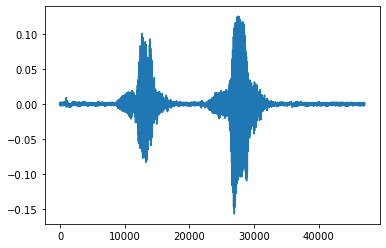

In [106]:
samples, sample_rate = librosa.load(filepath, sr = 16000)
plt.plot(np.asarray(samples))
plt.show()

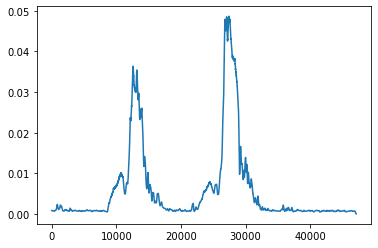

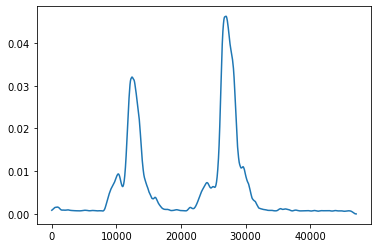

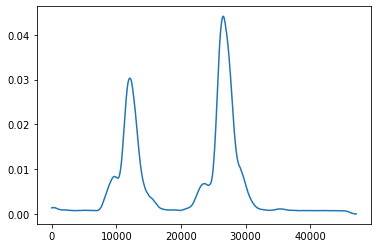

In [107]:
ma_ord=100
zr1=np.abs(samples)
plt.plot(MA(MA(np.asarray(zr1),ma_ord),ma_ord))
plt.show()
ma_ord=500
zr1=np.abs(samples)
plt.plot(MA(MA(np.asarray(zr1),ma_ord),ma_ord))
plt.show()
ma_ord=1000
zr1=np.abs(samples)
plt.plot(MA(MA(np.asarray(zr1),ma_ord),ma_ord))
plt.show()

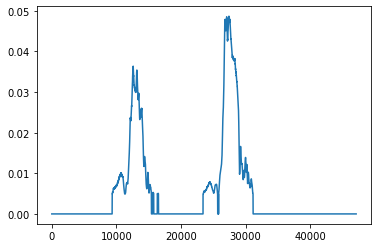

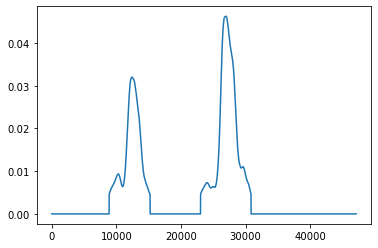

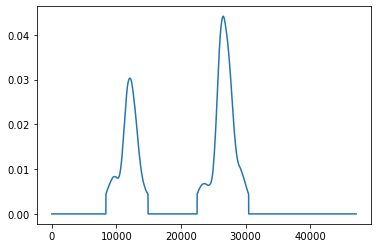

In [108]:
ma_ord=100
zr1=np.abs(samples)
plt.plot(filt_amp(MA(MA(np.asarray(zr1),ma_ord),ma_ord)))
plt.show()
ma_ord=500
zr1=np.abs(samples)
plt.plot(filt_amp(MA(MA(np.asarray(zr1),ma_ord),ma_ord)))
plt.show()
ma_ord=1000
zr1=np.abs(samples)
plt.plot(filt_amp(MA(MA(np.asarray(zr1),ma_ord),ma_ord)))
plt.show()

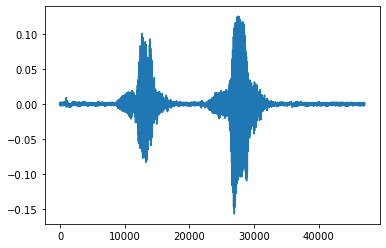

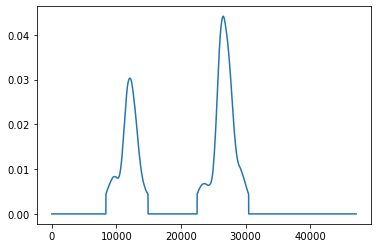

In [109]:
#break the sound file into two digit form
samples, sample_rate = librosa.load(filepath, sr = 16000)
plt.plot(np.asarray(samples))
plt.show()
ma_ord=1000
zr1=np.abs(samples)
plt.plot(filt_amp(MA(MA(np.asarray(zr1),ma_ord),ma_ord)))
plt.show()

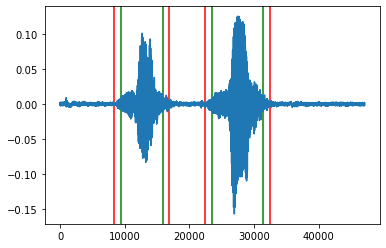

In [110]:
l1,r1,l2,r2=bound(filt_amp(MA(MA(np.asarray(zr1),ma_ord),ma_ord)))+ma_ord
plt.axvline(x=l1,color='g')
plt.axvline(x=r1,color='g')
plt.axvline(x=l2,color='g')
plt.axvline(x=r2,color='g')
l1=l1-ma_ord
r1=r1+ma_ord
l2=l2-ma_ord
r2=r2+ma_ord
plt.axvline(x=l1,color='r')
plt.axvline(x=r1,color='r')
plt.axvline(x=l2,color='r')
plt.axvline(x=r2,color='r')
plt.plot(np.asarray(samples))

plt.show()

In [10]:
from keras.models import load_model
model=load_model('C:\\Users\\ASUS\\aud\\best_model1.hdf5')

Using TensorFlow backend.


In [111]:
#prediction function
classes= ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
def predict(audio):
    audio=np.asarray(audio)
    dim_1 = np.shape(audio)[1]
    dim_2 = np.shape(audio)[2]
    channels = 1
    audio = audio.reshape((audio.shape[0], dim_1, dim_2, channels))
    prob=model.predict(audio)
    index=np.argmax(prob[0])
    return classes[index]

12


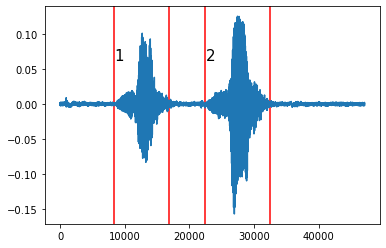

In [112]:
samp1=samples[l1:r1]
#fc = 6000  # Cut-off frequency of the filter
#w = fc / (fs / 2) # Normalize the frequency
#b, a = signal.butter(10, w, 'low')
#samp1 = signal.filtfilt(b, a, samp1)
samp2=samples[l2:r2]
#fc = 6000  # Cut-off frequency of the filter
#w = fc / (fs / 2) # Normalize the frequency
#b, a = signal.butter(10, w, 'low')
#samp2 = signal.filtfilt(b, a, samp2)
#samp1=np.asfortranarray(samp1)
#samp2=np.asfortranarray(samp2)
mfcc1 = librosa.feature.mfcc(samp1, sr=8000)
pad_width = 40 - mfcc1.shape[1]
mfcc1 = np.pad(mfcc1, pad_width=((0, 0), (0, pad_width)), mode='mean')
sam1=[]
sam1.append(mfcc1)
mfcc2 = librosa.feature.mfcc(samp2, sr=8000)
pad_width = 40 - mfcc2.shape[1]
mfcc2 = np.pad(mfcc2, pad_width=((0, 0), (0, pad_width)), mode='mean')
sam2=[]
sam2.append(mfcc2)
d1=predict(sam1)
d2=predict(sam2)
print(d1+""+d2)
plt.axvline(x=l1,color='r')
plt.axvline(x=r1,color='r')
plt.axvline(x=l2,color='r')
plt.axvline(x=r2,color='r')
plt.text(l1,np.max(samples)/2,d1,fontsize=15)
plt.text(l2,np.max(samples)/2,d2,fontsize=15)
plt.plot(np.asarray(samples))

plt.show()